# Gatsiva Condition All Returns Transaction

This notebook shows how to use and visualize the Gatsiva [Condition Returns (All)](https://gatsiva.com/docs/#condition-returns-all) transaction with Matplot.

The purpose of the condition returns all transaction is to show the period-by-period returns after each time a specific condition event occurs. 

API access is **currently limited to beta testers and collaborators**. For more information on how to utilize the Gatsiva API or to request access and an API key, please visit the [Gatsiva Website](https://gatsiva.com). For more information on the Gatsiva API, please visit the [Gatsiva API Documentation](https://gatsiva.com/docs).

## Enter Input Information Here

In [1]:
symbol = 'BTC:USD:daily'
condition = 'bollinger range(20,2) crosses below 0'
periods = 20
usingdatafrom = "2017-06-01"
usingdatato = "2017-09-20"
apikey = "<your_api_key>"

#### Python code to get the results - see results further below

In [3]:
# Import utility libraries we will need
import requests
import json
import numpy as np
import pandas as pd
import warnings

# Import plotly for graphing awesomeness
import matplotlib.pyplot as plt

# Ignore warnings
warnings.filterwarnings('ignore')

# Allow matplotlib to render inline (needed for pandas plotting)
%matplotlib inline

# Form the request
request_data = {'symbol':symbol,'condition_id':1,'condition':condition,"periods":periods,'from':usingdatafrom,'to':usingdatato}
bearer_token = 'Bearer ' + apikey
my_headers = {'Accept': 'application/json', 'Authorization': bearer_token}

# Send the request
analytic = requests.post('https://api.gatsiva.com/api/v1/conditions/all_returns',json=request_data,headers=my_headers)

# Pull out the results and format it into a pandas data frame
results = analytic.json()['results']
df = pd.read_json(json.dumps(results), orient='records')
df.sort_index(inplace=True)

## Example of Raw Results

Notice in the data table below, we now have each event in a column with the periods as the index. You will notice that NaN appears for any value that does not yet appear. In this case, since our input time period was only up to 2017-09-20, the event that occurred on 2017-09-13 does not yet have data for the 8th period and beyond since it had not occurred yet.

In [4]:
df

,2017-07-10 00:00:00,2017-07-14 00:00:00,2017-09-13 00:00:00
1,-0.008417,-0.115967,-0.162058
2,0.025200,-0.143266,-0.040444
3,0.007858,-0.000349,-0.044278
4,-0.046864,0.038520,-0.046684
5,-0.157396,0.021668,0.059424
6,-0.183416,0.282812,0.009733
7,-0.047197,0.197348,0.003067
8,-0.010149,0.269612,NaN
9,-0.026211,0.233841,NaN
10,0.222694,0.236889,NaN


### Simple Plot of the Results

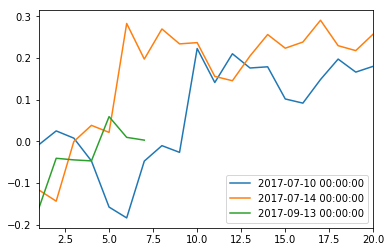

In [5]:
df.plot()